# Майнор по Анализу Данных, Группа ИАД-5
## 02/11/2017 Практика с нейронными сетями

In [2]:
!pip install sklearn

    100% |################################| 12.2MB 57kB/s  eta 0:00:01
  Running setup.py bdist_wheel for sklearn ... done
  Stored in directory: /root/.cache/pip/wheels/d7/db/a3/1b8041ab0be63b5c96c503df8e757cf205c2848cf9ef55f85e
Successfully built sklearn
You are using pip version 8.1.1, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
from keras.models import Sequential
from keras.layers import Dense

import numpy
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

RND_SEED = 7
plt.style.use('ggplot')

numpy.random.seed(RND_SEED)

%matplotlib inline

# Классификация

## Загрузка данных

Для тренеровки мы будем использовать достаточно известный набор данных [Pima Indians](http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes).

Признаки такие: <br\>
1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)


In [4]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data',
                 sep=',', header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
X, y = df.iloc[:, :8].values, df.iloc[:, 8].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=RND_SEED)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## Составляем модель

Построим простую 2х (3х) слойную нейронную сеть. Делать это в keras одно удовольствие

In [9]:
model = Sequential()
model.add(Dense(12, input_dim=8, init='normal', activation='relu'))
model.add(Dense(8, init='normal', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

/root/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, activation="relu", kernel_initializer="normal", input_dim=8)`
  
/root/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="normal")`
  This is separate from the ipykernel package so we can avoid doing imports until
/root/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


Теперь надо задать функцию [ошибки](https://keras.io/objectives/), способ [оптимизации](https://keras.io/optimizers/) и метрику измерения [качества](https://keras.io/metrics/):

In [10]:
from keras.optimizers import SGD

In [11]:
# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='sgd', 
              metrics=['accuracy'])

## Обучаем

In [12]:
# Fit the model
model.fit(X_train, y_train, 
          nb_epoch=500, 
          batch_size=50, 
          verbose=0)

/root/miniconda2/lib/python2.7/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


## Оценка качества

In [13]:
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

 32/154 [=====>........................] - ETA: 0sacc: 78.57%


In [14]:
y_hat = model.predict(X_test).flatten()

In [15]:
y_hat[:10]

array([ 0.12485517,  0.85288078,  0.77516389,  0.15957871,  0.33301044,
        0.4974491 ,  0.12491731,  0.33092454,  0.94426787,  0.14519519], dtype=float32)

Постройте ROC-кривые для обучающей и контрольной выборки. Есть ли переобучение?

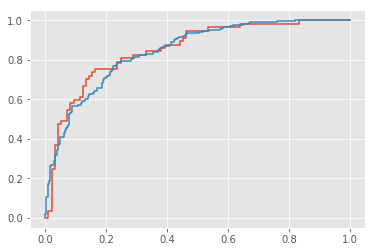

In [16]:
fpr, tpr, _ = roc_curve(y_test, y_hat, )
plt.plot(fpr, tpr, label='test')

y_hat_train = model.predict(X_train).flatten()
fpr, tpr, _ = roc_curve(y_train, y_hat_train, )
plt.plot(fpr, tpr, label='train')

# Регрессия

Будем строить регрессию на данных [Boston Housing Data Set](https://archive.ics.uci.edu/ml/datasets/Housing)

Описание:<br\>
1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centres
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per 10,000 USD
11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT: lower status of the population
14. MEDV: Median value of owner-occupied homes in 1000's USD

Весь pipeline практически повторяется. Ну и повторим.

In [77]:
from sklearn import datasets

In [78]:
boston = datasets.load_boston()

In [81]:
y = boston.target

In [82]:
X = boston.data

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=RND_SEED)

In [85]:
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## Составляем модель

Построим простую 2х (3х) слойную нейронную сеть. Делать это в keras одно удовольствие

In [90]:
model = Sequential()
model.add(Dense(12, input_dim=13, init='normal', activation='relu'))
model.add(Dense(8, init='normal', activation='relu'))
model.add(Dense(1, init='normal', activation='linear'))

Теперь надо задать функцию [ошибки](https://keras.io/objectives/), способ [оптимизации](https://keras.io/optimizers/) и метрику измерения [качества](https://keras.io/metrics/):

In [91]:
from keras.optimizers import SGD

In [92]:
# Compile model
model.compile(loss='mean_squared_error',
              optimizer='sgd', 
              metrics=['mean_squared_error'])

## Обучаем

In [17]:
# Fit the model
model.fit(X_train, y_train, 
          nb_epoch=500, 
          batch_size=50, 
          verbose=1)

Epoch 1/500
614/614 [==============================] - 0s - loss: 0.4720 - acc: 0.7801     
Epoch 2/500
614/614 [==============================] - 0s - loss: 0.4718 - acc: 0.7801     
Epoch 3/500
614/614 [==============================] - 0s - loss: 0.4718 - acc: 0.7801     
Epoch 4/500
614/614 [==============================] - 0s - loss: 0.4716 - acc: 0.7818     
Epoch 5/500
614/614 [==============================] - 0s - loss: 0.4715 - acc: 0.7801     
Epoch 6/500
614/614 [==============================] - 0s - loss: 0.4714 - acc: 0.7801     
Epoch 7/500
614/614 [==============================] - 0s - loss: 0.4713 - acc: 0.7769     
Epoch 8/500
614/614 [==============================] - 0s - loss: 0.4712 - acc: 0.7818     
Epoch 9/500
614/614 [==============================] - 0s - loss: 0.4712 - acc: 0.7801     
Epoch 10/500
614/614 [==============================] - 0s - loss: 0.4710 - acc: 0.7818     
Epoch 11/500
614/614 [==============================] - 0s - loss: 0.4709 - acc

614/614 [==============================] - 0s - loss: 0.4633 - acc: 0.7801     
Epoch 89/500
614/614 [==============================] - 0s - loss: 0.4631 - acc: 0.7769     
Epoch 90/500
614/614 [==============================] - 0s - loss: 0.4630 - acc: 0.7801     
Epoch 91/500
614/614 [==============================] - 0s - loss: 0.4629 - acc: 0.7785     
Epoch 92/500
614/614 [==============================] - 0s - loss: 0.4629 - acc: 0.7801     
Epoch 93/500
614/614 [==============================] - 0s - loss: 0.4629 - acc: 0.7801     
Epoch 94/500
614/614 [==============================] - 0s - loss: 0.4627 - acc: 0.7785     
Epoch 95/500
614/614 [==============================] - 0s - loss: 0.4626 - acc: 0.7801     
Epoch 96/500
614/614 [==============================] - 0s - loss: 0.4626 - acc: 0.7801     
Epoch 97/500
614/614 [==============================] - 0s - loss: 0.4625 - acc: 0.7818     
Epoch 98/500
614/614 [==============================] - 0s - loss: 0.4624 - acc: 0.

614/614 [==============================] - 0s - loss: 0.4560 - acc: 0.7818     
Epoch 174/500
614/614 [==============================] - 0s - loss: 0.4558 - acc: 0.7834     
Epoch 175/500
614/614 [==============================] - 0s - loss: 0.4557 - acc: 0.7834     
Epoch 176/500
614/614 [==============================] - 0s - loss: 0.4555 - acc: 0.7818     
Epoch 177/500
614/614 [==============================] - 0s - loss: 0.4553 - acc: 0.7850     
Epoch 178/500
614/614 [==============================] - 0s - loss: 0.4554 - acc: 0.7834     
Epoch 179/500
614/614 [==============================] - 0s - loss: 0.4552 - acc: 0.7834     
Epoch 180/500
614/614 [==============================] - 0s - loss: 0.4552 - acc: 0.7834     
Epoch 181/500
614/614 [==============================] - 0s - loss: 0.4552 - acc: 0.7834     
Epoch 182/500
614/614 [==============================] - 0s - loss: 0.4550 - acc: 0.7818     
Epoch 183/500
614/614 [==============================] - 0s - loss: 0.4549

614/614 [==============================] - 0s - loss: 0.4492 - acc: 0.7785     
Epoch 260/500
614/614 [==============================] - 0s - loss: 0.4489 - acc: 0.7785     
Epoch 261/500
614/614 [==============================] - 0s - loss: 0.4489 - acc: 0.7785     
Epoch 262/500
614/614 [==============================] - 0s - loss: 0.4489 - acc: 0.7785     
Epoch 263/500
614/614 [==============================] - 0s - loss: 0.4489 - acc: 0.7785     
Epoch 264/500
614/614 [==============================] - 0s - loss: 0.4487 - acc: 0.7801     
Epoch 265/500
614/614 [==============================] - 0s - loss: 0.4487 - acc: 0.7785     
Epoch 266/500
614/614 [==============================] - 0s - loss: 0.4486 - acc: 0.7818     
Epoch 267/500
614/614 [==============================] - 0s - loss: 0.4486 - acc: 0.7785     
Epoch 268/500
614/614 [==============================] - 0s - loss: 0.4485 - acc: 0.7801     
Epoch 269/500
614/614 [==============================] - 0s - loss: 0.4485

614/614 [==============================] - 0s - loss: 0.4435 - acc: 0.7785     
Epoch 346/500
614/614 [==============================] - 0s - loss: 0.4435 - acc: 0.7769     
Epoch 347/500
614/614 [==============================] - 0s - loss: 0.4433 - acc: 0.7752     
Epoch 348/500
614/614 [==============================] - 0s - loss: 0.4434 - acc: 0.7785     
Epoch 349/500
614/614 [==============================] - 0s - loss: 0.4430 - acc: 0.7785     
Epoch 350/500
614/614 [==============================] - 0s - loss: 0.4430 - acc: 0.7769     
Epoch 351/500
614/614 [==============================] - 0s - loss: 0.4431 - acc: 0.7769     
Epoch 352/500
614/614 [==============================] - 0s - loss: 0.4429 - acc: 0.7769     
Epoch 353/500
614/614 [==============================] - 0s - loss: 0.4428 - acc: 0.7752     
Epoch 354/500
614/614 [==============================] - 0s - loss: 0.4428 - acc: 0.7752     
Epoch 355/500
614/614 [==============================] - 0s - loss: 0.4425

614/614 [==============================] - 0s - loss: 0.4382 - acc: 0.7785     
Epoch 432/500
614/614 [==============================] - 0s - loss: 0.4383 - acc: 0.7801     
Epoch 433/500
614/614 [==============================] - 0s - loss: 0.4381 - acc: 0.7769     
Epoch 434/500
614/614 [==============================] - 0s - loss: 0.4380 - acc: 0.7785     
Epoch 435/500
614/614 [==============================] - 0s - loss: 0.4381 - acc: 0.7785     
Epoch 436/500
614/614 [==============================] - 0s - loss: 0.4380 - acc: 0.7785     
Epoch 437/500
614/614 [==============================] - 0s - loss: 0.4380 - acc: 0.7801     
Epoch 438/500
614/614 [==============================] - 0s - loss: 0.4381 - acc: 0.7785     
Epoch 439/500
614/614 [==============================] - 0s - loss: 0.4378 - acc: 0.7801     
Epoch 440/500
614/614 [==============================] - 0s - loss: 0.4377 - acc: 0.7769     
Epoch 441/500
614/614 [==============================] - 0s - loss: 0.4378

## Оценка качества

In [18]:
scores = model.evaluate(X_test, y_test)
print("%s: %.2f" % (model.metrics_names[1], scores[1]))

 32/154 [=====>........................] - ETA: 0sacc: 0.78


# Конволюционные нейронные сети

<img src='http://i.stack.imgur.com/oUwMk.png'>

In [19]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

from keras.layers import Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

from keras import backend as K

In [20]:
from keras.optimizers import SGD

In [21]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

n_train, img_rows, img_cols = X_train.shape
n_test, _, _ = X_test.shape

n_train, n_test, img_rows, img_cols

11337728/11490434 [============================>.] - ETA: 0s

(60000, 10000, 28, 28)

Посмотрим на данные

## Готовим данные
Есть некоторые заморочки связанные с тем, в каком виде должны быть данные

In [22]:
X_train.shape

(60000, 28, 28)

In [23]:
img_rows, img_cols = 28, 28

if K.image_dim_ordering() != 'tf':
    shape_ord = (1, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 1)

In [24]:
X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255


# numbers 0-9, so ten classes
n_classes = 10

y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [25]:
X_train.shape

(60000, 28, 28, 1)

## Составляем модель

In [ ]:
# Количество конволюционных фильтров
n_filters = 32

# Размер фильра
n_conv = 3

# Размер пуллинга
n_pool = 2

# Размерность входной картинки
input_shape = (28, 28, 1)

model = Sequential()
model.add(Convolution2D( 
        n_filters, n_conv, n_conv,
        border_mode='valid',
        input_shape=input_shape,
        activation='relu'
))

# Конволюция
model.add(Convolution2D(n_filters, n_conv, n_conv, activation='relu'))

# Пуллинг
model.add(MaxPooling2D(pool_size=(n_pool, n_pool)))
model.add(Dropout(0.25))

# Выравниваем
model.add(Flatten())

# Делаем полносвязный слой
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Softmax в конце
model.add(Dense(n_classes, activation='softmax'))

/root/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid", activation="relu", input_shape=(28, 28, 1...)`
/root/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`


In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
model.fit(X_train,
          y_train,
          batch_size=32,
          nb_epoch=10,
          validation_data=(X_test, y_test),
          verbose=1)

## Внитри модели

In [ ]:
for i, layer in enumerate(model.layers):
    print ("Layer", i, "\t", layer.name, "\t\t", layer.input_shape, "\t", layer.output_shape)

In [ ]:
for i, layer in enumerate(model.layers):
    if len(layer.get_weights()) > 0:
        W, b = layer.get_weights()
        print("Layer", i, "\t", layer.name, "\t\t", W.shape, "\t", b.shape)

# Цветные картинки

In [ ]:
from keras.datasets import cifar10
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

nb_classes = 10
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

По сути это уменьшенные изображения, которые нам повсюду встречаются. Сеть должна уметь выполнять классификацию не зависимо от того, повернут ли объект, уменьшен он или увеличен и тп.

То есть в обучающей выборке должны содержаться такие элементарные трансформации

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

generated_images = ImageDataGenerator(
    featurewise_center=True,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=True,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

generated_images.fit(X_train)

Далее, продолжаем по https://github.com/fchollet/keras/blob/master/examples/cifar10_cnn.py